In [24]:
"""
This file represents the component functions of the S-Boxes, where from that the non-linear and linear bits of the output 
can be determined.

also, this file computes the bit representation of the Mix columns for the block ciphers used in the paper.

It should be noted that:
# X0 is LSB (The rightmost bit) when using Boolean Function's objects  (or component function)
# X0 is MSB (The leftmost bit) when using sb.polynomials()
"""

"\nThis file represents the component functions of the S-Boxes, where from that the non-linear and linear bits of the output \ncan be determined.\n\nalso, this file computes the bit representation of the Mix columns for the block ciphers used in the paper.\n\nIt should be noted that:\n# X0 is LSB (The rightmost bit) when using Boolean Function's objects  (or component function)\n# X0 is MSB (The leftmost bit) when using sb.polynomials()\n"

In [23]:
#==============================================================================================================
#===============================================CRAFT==========================================================
#==============================================================================================================

In [2]:
#=====================================analyzing the s-box======================================================

In [3]:
#component functions 

from sage.crypto.sboxes import SBox
L = [12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6]
sb = SBox(L)


f = sb.component_function([1, 0, 0, 0])
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\n\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)

Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


the inverse sbox in hex format:
(12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6)

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


In [4]:
# re finding the component function in another way  (by changing the order x0 becomes MSB instead of LSB)
from sage.crypto.sboxes import SBox

L = [12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6]
sb = SBox(L)

R = BooleanPolynomialRing(names=[f"x{i}" for i in range(sb.input_size())])
vars = list(R.gens())
# print(vars)
F = []
for i in range(sb.input_size()):
    temp = sb.component_function(1 << i).algebraic_normal_form()
    F.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F.reverse(); 
print(F)


print('\ninverse:')

F_inv = []
inverse_sb = sb.inverse()
for i in range(inverse_sb.input_size()):
    temp = inverse_sb.component_function(1 << i).algebraic_normal_form()
    F_inv.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F_inv.reverse();
print(F_inv)


[x0*x1*x2 + x0*x1 + x0*x2*x3 + x0*x2 + x2*x3 + 1, x0*x1*x2 + x0*x2*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1, x0*x1 + x0*x3 + x1*x3 + x1 + x3, x0*x1*x2 + x0*x2*x3 + x0*x3 + x1*x2*x3 + x1*x3 + x2]

inverse:
[x0*x1*x2 + x0*x1 + x0*x2*x3 + x0*x2 + x2*x3 + 1, x0*x1*x2 + x0*x2*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1, x0*x1 + x0*x3 + x1*x3 + x1 + x3, x0*x1*x2 + x0*x2*x3 + x0*x3 + x1*x2*x3 + x1*x3 + x2]


In [ ]:
#========================================mix column diffusion============================================

the Qarma difuuson matrix is as follows:


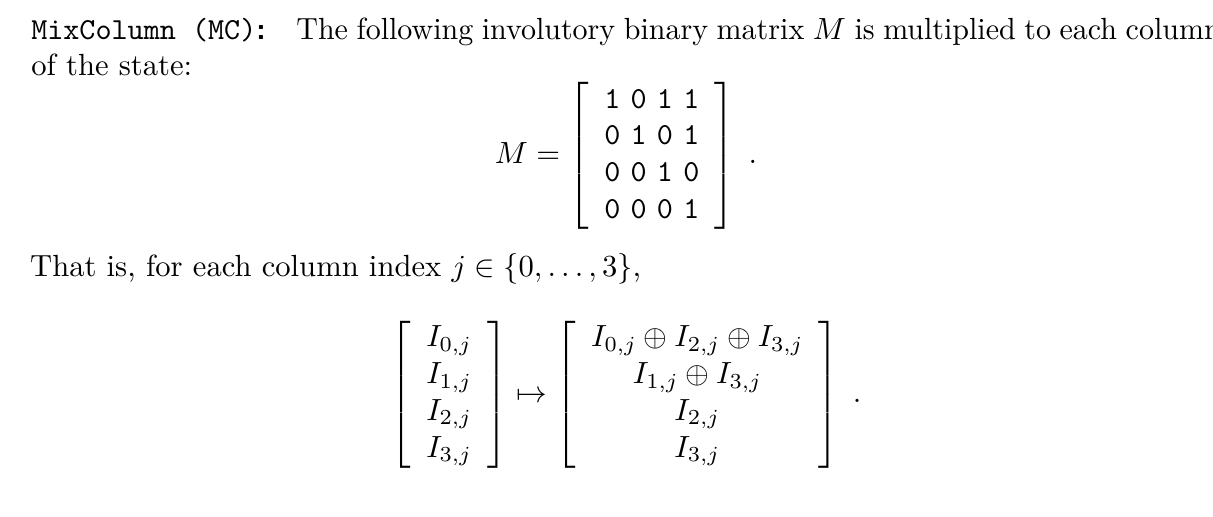

In [5]:
from IPython.display import Image
print('the Qarma difuuson matrix is as follows:')
Image(filename='CRAFT-mix-column.png')

In [6]:

I = identity_matrix(GF(2), 4)
zero = zero_matrix(GF(2), 4)

M1 = [[I,    zero, I,    I], 
      [zero, I,    zero, I], 
      [zero, zero, I,    zero], 
      [zero, zero, zero, I]]

M = block_matrix(M1)
print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

Identity = M * M_inv
print('\nthe multiplication of the matrices M and M_inv is as follows:')
show(Identity, format='latex', latex_command='array')



the joint of all 16 matrices according to formula is as follows:


[1 0 0 0|0 0 0 0|1 0 0 0|1 0 0 0]
[0 1 0 0|0 0 0 0|0 1 0 0|0 1 0 0]
[0 0 1 0|0 0 0 0|0 0 1 0|0 0 1 0]
[0 0 0 1|0 0 0 0|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[0 0 0 0|1 0 0 0|0 0 0 0|1 0 0 0]
[0 0 0 0|0 1 0 0|0 0 0 0|0 1 0 0]
[0 0 0 0|0 0 1 0|0 0 0 0|0 0 1 0]
[0 0 0 0|0 0 0 1|0 0 0 0|0 0 0 1]
[-------+-------+-------+-------]
[0 0 0 0|0 0 0 0|1 0 0 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 1 0 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 0 1 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 0 0 1|0 0 0 0]
[-------+-------+-------+-------]
[0 0 0 0|0 0 0 0|0 0 0 0|1 0 0 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 1 0 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 0 1 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 0 0 1]


the inverse of joint of all 16 matrices according to formula is as follows:


[1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


the multiplication of the matrices M and M_inv is as follows:


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

In [7]:
'''
computing the multiplication of the matrix M and M_inv on A
'''

BF = PolynomialRing(GF(2), names = [f"a{i}" for i in range(16)])
a = BF.gens()
A = matrix([
    [a[0]], [a[1]], [a[2]], [a[3]],
    [a[4]], [a[5]], [a[6]], [a[7]],
    [a[8]], [a[9]], [a[10]], [a[11]],
    [a[12]], [a[13]], [a[14]], [a[15]]
])

print('the 4 nibles in the column in the state are as follows:')
show(A, format='latex', latex_command='array')

I = identity_matrix(GF(2), 4)
zero = zero_matrix(GF(2), 4)

M1 = [[I, zero, I, I], [zero, I, zero, I], [zero, zero, I, zero], [zero, zero, zero, I]]
M = block_matrix(M1)

print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

M_A = M * A
print('\nthe multiplication of M and A is as follows:')
show(M_A, format='latex', latex_command='array')

M_inv_A = M_inv * A
print('\nthe multiplication of M_inv and A is as follows:')
show(M_inv_A, format='latex', latex_command='array')


the 4 nibles in the column in the state are as follows:


[ a0]
[ a1]
[ a2]
[ a3]
[ a4]
[ a5]
[ a6]
[ a7]
[ a8]
[ a9]
[a10]
[a11]
[a12]
[a13]
[a14]
[a15]


the joint of all 16 matrices according to formula is as follows:


[1 0 0 0|0 0 0 0|1 0 0 0|1 0 0 0]
[0 1 0 0|0 0 0 0|0 1 0 0|0 1 0 0]
[0 0 1 0|0 0 0 0|0 0 1 0|0 0 1 0]
[0 0 0 1|0 0 0 0|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[0 0 0 0|1 0 0 0|0 0 0 0|1 0 0 0]
[0 0 0 0|0 1 0 0|0 0 0 0|0 1 0 0]
[0 0 0 0|0 0 1 0|0 0 0 0|0 0 1 0]
[0 0 0 0|0 0 0 1|0 0 0 0|0 0 0 1]
[-------+-------+-------+-------]
[0 0 0 0|0 0 0 0|1 0 0 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 1 0 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 0 1 0|0 0 0 0]
[0 0 0 0|0 0 0 0|0 0 0 1|0 0 0 0]
[-------+-------+-------+-------]
[0 0 0 0|0 0 0 0|0 0 0 0|1 0 0 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 1 0 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 0 1 0]
[0 0 0 0|0 0 0 0|0 0 0 0|0 0 0 1]


the inverse of joint of all 16 matrices according to formula is as follows:


[1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


the multiplication of M and A is as follows:


[ a0 + a8 + a12]
[ a1 + a9 + a13]
[a2 + a10 + a14]
[a3 + a11 + a15]
[      a4 + a12]
[      a5 + a13]
[      a6 + a14]
[      a7 + a15]
[            a8]
[            a9]
[           a10]
[           a11]
[           a12]
[           a13]
[           a14]
[           a15]


the multiplication of M_inv and A is as follows:


[ a0 + a8 + a12]
[ a1 + a9 + a13]
[a2 + a10 + a14]
[a3 + a11 + a15]
[      a4 + a12]
[      a5 + a13]
[      a6 + a14]
[      a7 + a15]
[            a8]
[            a9]
[           a10]
[           a11]
[           a12]
[           a13]
[           a14]
[           a15]

In [8]:
#==============================================================================================================
#===============================================Miduri=======================================================
#==============================================================================================================

In [9]:
#=====================================analyzing the s-box======================================================

In [10]:
#component functions sb0

from sage.crypto.sboxes import SBox
L = [12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6]
sb = SBox(L)


f = sb.component_function([1, 0, 0, 0])
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\n\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)

Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


the inverse sbox in hex format:
(12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6)

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


In [11]:
#component functions sb1

from sage.crypto.sboxes import SBox
L = [1, 0, 5, 3, 14, 2, 15, 7, 13, 10, 9, 11, 12, 8, 4, 6]
sb = SBox(L)


f = sb.component_function([1, 0, 0, 0])
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\n\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)

Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x2*x3 + x0*x2 + x1*x2*x3 + x2*x3 + x2 + x3

[0, 1, 0, 0]:  x0*x1 + x0*x2*x3 + x0*x2 + x0*x3 + x1*x2 + x1 + x2*x3 + x2 + x3

[0, 0, 1, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x3 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1 + x0*x2 + x0 + x1*x2*x3 + x1*x2 + x2 + 1


the inverse sbox in hex format:
(1, 0, 5, 3, 14, 2, 15, 7, 13, 10, 9, 11, 12, 8, 4, 6)

[1, 0, 0, 0]:  x0*x2*x3 + x0*x2 + x1*x2*x3 + x2*x3 + x2 + x3

[0, 1, 0, 0]:  x0*x1 + x0*x2*x3 + x0*x2 + x0*x3 + x1*x2 + x1 + x2*x3 + x2 + x3

[0, 0, 1, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x3 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1 + x0*x2 + x0 + x1*x2*x3 + x1*x2 + x2 + 1


In [12]:
#========================================mix column diffusion============================================

the Qarma difuuson matrix is as follows:


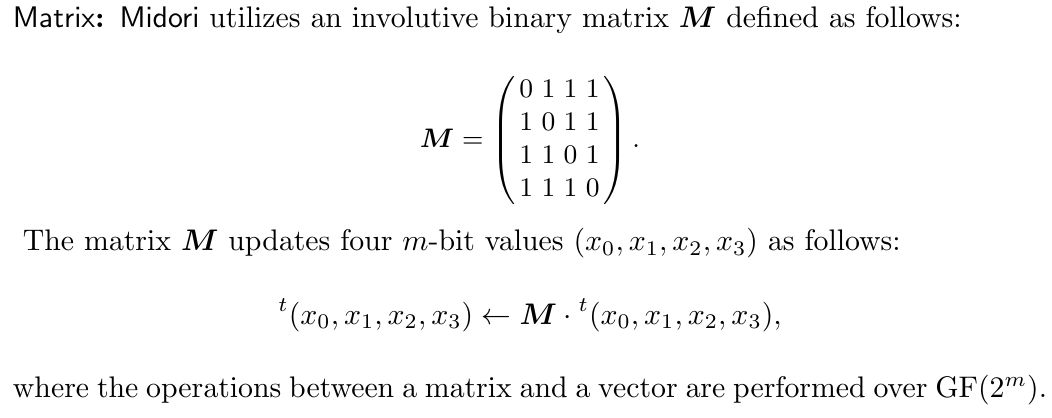

In [13]:
from IPython.display import Image
print('the Qarma difuuson matrix is as follows:')
Image(filename='Miduri-mix-column.png')

In [14]:
#=======midori64==============
I = identity_matrix(GF(2), 4)
zero = zero_matrix(GF(2), 4)

M1 = [[zero, I,    I,    I], 
      [I,    zero, I,    I], 
      [I,    I,    zero, I], 
      [I,    I,    I,    zero]]

M = block_matrix(M1)
print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

Identity = M * M_inv
print('\nthe multiplication of the matrices M and M_inv is as follows:')
show(Identity, format='latex', latex_command='array')


the joint of all 16 matrices according to formula is as follows:


[0 0 0 0|1 0 0 0|1 0 0 0|1 0 0 0]
[0 0 0 0|0 1 0 0|0 1 0 0|0 1 0 0]
[0 0 0 0|0 0 1 0|0 0 1 0|0 0 1 0]
[0 0 0 0|0 0 0 1|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|0 0 0 0|1 0 0 0|1 0 0 0]
[0 1 0 0|0 0 0 0|0 1 0 0|0 1 0 0]
[0 0 1 0|0 0 0 0|0 0 1 0|0 0 1 0]
[0 0 0 1|0 0 0 0|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|1 0 0 0|0 0 0 0|1 0 0 0]
[0 1 0 0|0 1 0 0|0 0 0 0|0 1 0 0]
[0 0 1 0|0 0 1 0|0 0 0 0|0 0 1 0]
[0 0 0 1|0 0 0 1|0 0 0 0|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|1 0 0 0|1 0 0 0|0 0 0 0]
[0 1 0 0|0 1 0 0|0 1 0 0|0 0 0 0]
[0 0 1 0|0 0 1 0|0 0 1 0|0 0 0 0]
[0 0 0 1|0 0 0 1|0 0 0 1|0 0 0 0]


the inverse of joint of all 16 matrices according to formula is as follows:


[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]
[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]


the multiplication of the matrices M and M_inv is as follows:


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

In [15]:
#=======midori64==============
'''
computing the multiplication of the matrix M and M_inv on A in GF(2)
'''

BF = PolynomialRing(GF(2), names = [f"a{i}" for i in range(16)])
a = BF.gens()
A = matrix([
    [a[0]], [a[1]], [a[2]], [a[3]],
    [a[4]], [a[5]], [a[6]], [a[7]],
    [a[8]], [a[9]], [a[10]], [a[11]],
    [a[12]], [a[13]], [a[14]], [a[15]]
])

print('the 4 nibles in the column in the state are as follows:')
show(A, format='latex', latex_command='array')

I = identity_matrix(GF(2), 4)
zero = zero_matrix(GF(2), 4)

M1 = [[zero, I,    I,    I], 
      [I,    zero, I,    I], 
      [I,    I,    zero, I], 
      [I,    I,    I,    zero]]
M = block_matrix(M1)

print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

M_A = M * A
print('\nthe multiplication of M and A is as follows:')
show(M_A, format='latex', latex_command='array')

M_inv_A = M_inv * A
print('\nthe multiplication of M_inv and A is as follows:')
show(M_inv_A, format='latex', latex_command='array')

the 4 nibles in the column in the state are as follows:


[ a0]
[ a1]
[ a2]
[ a3]
[ a4]
[ a5]
[ a6]
[ a7]
[ a8]
[ a9]
[a10]
[a11]
[a12]
[a13]
[a14]
[a15]


the joint of all 16 matrices according to formula is as follows:


[0 0 0 0|1 0 0 0|1 0 0 0|1 0 0 0]
[0 0 0 0|0 1 0 0|0 1 0 0|0 1 0 0]
[0 0 0 0|0 0 1 0|0 0 1 0|0 0 1 0]
[0 0 0 0|0 0 0 1|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|0 0 0 0|1 0 0 0|1 0 0 0]
[0 1 0 0|0 0 0 0|0 1 0 0|0 1 0 0]
[0 0 1 0|0 0 0 0|0 0 1 0|0 0 1 0]
[0 0 0 1|0 0 0 0|0 0 0 1|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|1 0 0 0|0 0 0 0|1 0 0 0]
[0 1 0 0|0 1 0 0|0 0 0 0|0 1 0 0]
[0 0 1 0|0 0 1 0|0 0 0 0|0 0 1 0]
[0 0 0 1|0 0 0 1|0 0 0 0|0 0 0 1]
[-------+-------+-------+-------]
[1 0 0 0|1 0 0 0|1 0 0 0|0 0 0 0]
[0 1 0 0|0 1 0 0|0 1 0 0|0 0 0 0]
[0 0 1 0|0 0 1 0|0 0 1 0|0 0 0 0]
[0 0 0 1|0 0 0 1|0 0 0 1|0 0 0 0]


the inverse of joint of all 16 matrices according to formula is as follows:


[0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1]
[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]


the multiplication of M and A is as follows:


[ a4 + a8 + a12]
[ a5 + a9 + a13]
[a6 + a10 + a14]
[a7 + a11 + a15]
[ a0 + a8 + a12]
[ a1 + a9 + a13]
[a2 + a10 + a14]
[a3 + a11 + a15]
[ a0 + a4 + a12]
[ a1 + a5 + a13]
[ a2 + a6 + a14]
[ a3 + a7 + a15]
[  a0 + a4 + a8]
[  a1 + a5 + a9]
[ a2 + a6 + a10]
[ a3 + a7 + a11]


the multiplication of M_inv and A is as follows:


[ a4 + a8 + a12]
[ a5 + a9 + a13]
[a6 + a10 + a14]
[a7 + a11 + a15]
[ a0 + a8 + a12]
[ a1 + a9 + a13]
[a2 + a10 + a14]
[a3 + a11 + a15]
[ a0 + a4 + a12]
[ a1 + a5 + a13]
[ a2 + a6 + a14]
[ a3 + a7 + a15]
[  a0 + a4 + a8]
[  a1 + a5 + a9]
[ a2 + a6 + a10]
[ a3 + a7 + a11]

In [16]:
#=======midori128==============
I = identity_matrix(GF(2), 8)
zero = zero_matrix(GF(2), 8)

M1 = [[zero, I,    I,    I], 
      [I,    zero, I,    I], 
      [I,    I,    zero, I], 
      [I,    I,    I,    zero]]

M = block_matrix(M1)
print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

Identity = M * M_inv
print('\nthe multiplication of the matrices M and M_inv is as follows:')
show(Identity, format='latex', latex_command='array')


the joint of all 16 matrices according to formula is as follows:


32 x 32 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)


the inverse of joint of all 16 matrices according to formula is as follows:


32 x 32 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)


the multiplication of the matrices M and M_inv is as follows:


32 x 32 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)

In [17]:
#=======midori128==============
'''
computing the multiplication of the matrix M and M_inv on A in GF(2)
'''

BF = PolynomialRing(GF(2), names = [f"a{i}" for i in range(32)])
a = BF.gens()
A = matrix([
    [a[0]], [a[1]], [a[2]], [a[3]], [a[4]], [a[5]], [a[6]], [a[7]],    
    [a[8]], [a[9]], [a[10]], [a[11]], [a[12]], [a[13]], [a[14]], [a[15]],
    [a[16]], [a[17]], [a[18]], [a[19]], [a[20]], [a[21]], [a[22]], [a[23]],
    [a[24]], [a[25]], [a[26]], [a[27]], [a[28]], [a[29]], [a[30]], [a[31]]
])

print('the 4 bytes in the column in the state are as follows:')
show(A, format='latex', latex_command='array')

I = identity_matrix(GF(2), 8)
zero = zero_matrix(GF(2), 8)

M1 = [[zero, I,    I,    I], 
      [I,    zero, I,    I], 
      [I,    I,    zero, I], 
      [I,    I,    I,    zero]]
M = block_matrix(M1)

print('\nthe joint of all 16 matrices according to formula is as follows:')
show(M, format='latex', latex_command='array')

M_inv = M.inverse()
print('\nthe inverse of joint of all 16 matrices according to formula is as follows:')
show(M_inv, format='latex', latex_command='array')

M_A = M * A
print('\nthe multiplication of M and A is as follows:')
show(M_A, format='latex', latex_command='array')

M_inv_A = M_inv * A
print('\nthe multiplication of M_inv and A is as follows:')
show(M_inv_A, format='latex', latex_command='array')

the 4 bytes in the column in the state are as follows:


32 x 1 dense matrix over Multivariate Polynomial Ring in a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31 over Finite Field of size 2 (use the '.str()' method to see the entries)


the joint of all 16 matrices according to formula is as follows:


32 x 32 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)


the inverse of joint of all 16 matrices according to formula is as follows:


32 x 32 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)


the multiplication of M and A is as follows:


32 x 1 dense matrix over Multivariate Polynomial Ring in a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31 over Finite Field of size 2 (use the '.str()' method to see the entries)


the multiplication of M_inv and A is as follows:


32 x 1 dense matrix over Multivariate Polynomial Ring in a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31 over Finite Field of size 2 (use the '.str()' method to see the entries)

In [18]:
#==============================================================================================================
#===============================================WARP==========================================================
#==============================================================================================================

In [19]:
#=====================================analyzing the s-box======================================================

In [20]:
#component functions 

from sage.crypto.sboxes import SBox
L = [12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6]
sb = SBox(L)


f = sb.component_function([1, 0, 0, 0])
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\n\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)

Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


the inverse sbox in hex format:
(12, 10, 13, 3, 14, 11, 15, 7, 8, 9, 1, 5, 0, 2, 4, 6)

[1, 0, 0, 0]:  x0*x1*x3 + x0*x1 + x1*x2*x3 + x1*x3 + x2*x3 + 1

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x3 + x0 + x1*x2*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x0 + x2*x3 + x2

[0, 0, 0, 1]:  x0*x1*x2 + x0*x1*x3 + x0*x2 + x0*x3 + x1*x2*x3 + x1


In [21]:
#==============================================================================================================
#===============================================PRESENT========================================================
#==============================================================================================================

In [25]:
from sage.crypto.sboxes import PRESENT as sb

print('the sbox in hex format:')
print(sb)

f = sb.component_function([1, 0, 0, 0])
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)


the sbox in hex format:
(12, 5, 6, 11, 9, 0, 10, 13, 3, 14, 15, 8, 4, 7, 1, 2)
Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x2*x3 + x0 + x1*x2 + x1 + x3 + 1

[0, 1, 0, 0]:  x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x3 + x1*x3 + x2 + x3 + 1

[0, 0, 1, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x2*x3 + x1*x3 + x1 + x2*x3 + x3

[0, 0, 0, 1]:  x0 + x1*x2 + x2 + x3

the inverse sbox in hex format:
(5, 14, 15, 8, 12, 1, 2, 13, 11, 4, 6, 3, 0, 7, 9, 10)

[1, 0, 0, 0]:  x0*x1*x2 + x0*x1 + x0*x2*x3 + x0 + x1 + x2 + x3

[0, 1, 0, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x2 + x0*x3 + x1*x2 + x1*x3 + x3 + 1

[0, 0, 1, 0]:  x0*x1*x2 + x0*x1*x3 + x0*x2*x3 + x0*x2 + x0 + x1*x3 + x1 + x2*x3 + x3

[0, 0, 0, 1]:  x0 + x1*x3 + x2 + 1


In [26]:
# re finding the component function in another way  (by changing the order x0 becomes MSB instead of LSB)
from sage.crypto.sboxes import PRESENT as sb

R = BooleanPolynomialRing(names=[f"x{i}" for i in range(sb.input_size())])
vars = list(R.gens())
# print(vars)
F = []
for i in range(sb.input_size()):
    temp = sb.component_function(1 << i).algebraic_normal_form()
    F.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F.reverse(); 
print(F)


print('\ninverse:')

F_inv = []
inverse_sb = sb.inverse()
for i in range(inverse_sb.input_size()):
    temp = inverse_sb.component_function(1 << i).algebraic_normal_form()
    F_inv.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F_inv.reverse();
print(F_inv)



[x0*x1*x3 + x0*x2*x3 + x0 + x1*x2*x3 + x1*x2 + x2 + x3 + 1, x0*x1*x3 + x0*x2*x3 + x0*x2 + x0*x3 + x0 + x1 + x2*x3 + 1, x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x2 + x0 + x1*x2*x3 + x2, x0 + x1*x2 + x1 + x3]

inverse:
[x0*x1*x3 + x0 + x1*x2*x3 + x1 + x2*x3 + x2 + x3, x0*x1*x3 + x0*x2*x3 + x0*x2 + x0*x3 + x0 + x1*x2*x3 + x1*x2 + x1*x3 + x2*x3 + 1, x0*x1*x3 + x0*x1 + x0*x2*x3 + x0*x2 + x0 + x1*x2*x3 + x1*x3 + x2 + x3, x0*x2 + x1 + x3 + 1]


In [27]:
#==============================================================================================================
#===================================================ARADI=======================================================
#==============================================================================================================

In [28]:
#=====================================analyzing the s-box======================================================

the Qarma difuuson matrix is as follows:


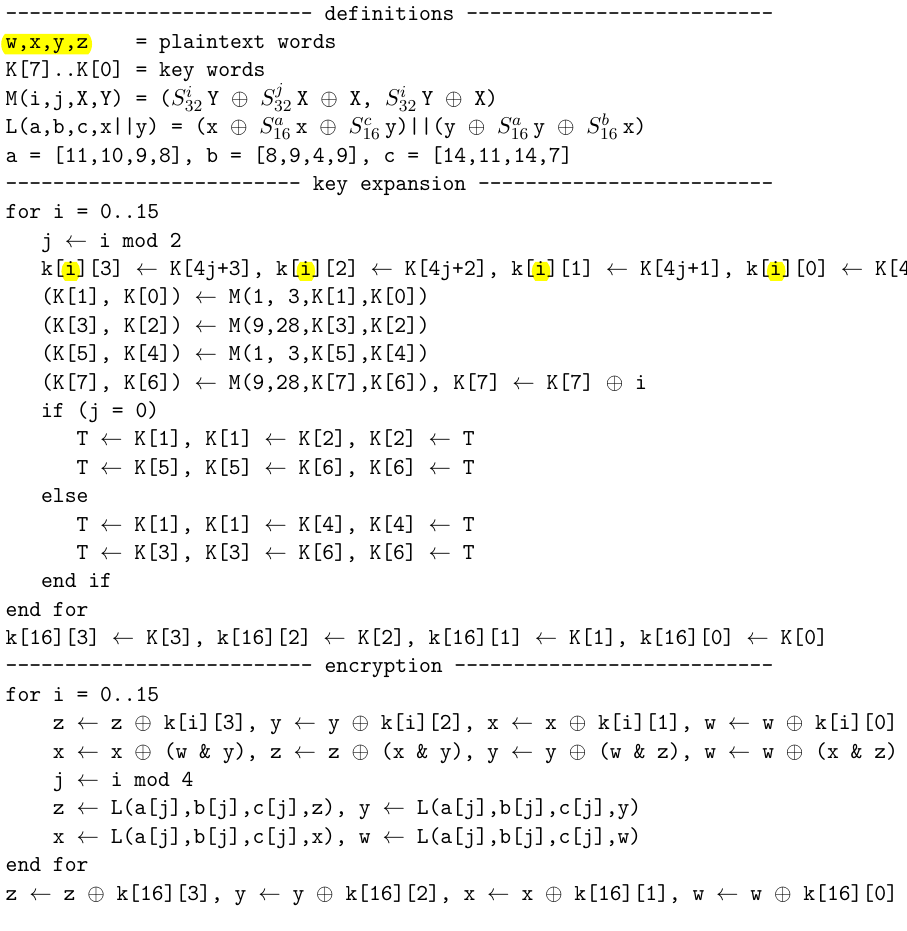

In [29]:
from IPython.display import Image
print('the Qarma difuuson matrix is as follows:')
Image(filename='ARADI.png')

In [30]:
#=====================================analyzing the s-box======================================================

In [31]:
# trying to calculate the look-up table for the s-box 

'''
w   x  y   z

x <-- x + (w & y)    z <-- z + (x & y)   y <-- y + (w & z)  w <-- w + (x & z) 

least  -->  z  y  x w
'''

# Define the polynomial ring
BF = PolynomialRing(GF(2), names=["w0", "x0", "y0", "z0", "w1", "x1", "y1", "z1"])
w0, x0, y0, z0, w1, x1, y1, z1 = BF.gens()

# Define the expressions
x1 = x0 + w0 * y0
z1 = z0 + x1 * y0
y1 = y0 + w0 * z1
w1 = w0 + x1 * z1

# Forming the look-up table
for i in range(16):
    binary_str = f"{i:04b}"  # Convert `i` to a 4-bit binary string
    w = int(binary_str[0])    # Most significant bit
    x = int(binary_str[1])
    y = int(binary_str[2])
    z = int(binary_str[3])    # Least significant bit


   

    # Substitute values into the expressions
    z1_out = z1.subs({z0: z, y0: y, x0: x, w0: w})
    y1_out = y1.subs({z0: z, y0: y, x0: x, w0: w})
    x1_out = x1.subs({z0: z, y0: y, x0: x, w0: w})
    w1_out = w1.subs({z0: z, y0: y, x0: x, w0: w})
    
    


    # Combine outputs into a 4-bit number and convert to hex
    output_s_box = hex((int(w1_out) << 3) | (int(x1_out) << 2) | (int(y1_out) << 1) | int(z1_out))
    print('S(', i, ') = ', output_s_box)
 




S( 0 ) =  0x0
S( 1 ) =  0x1
S( 2 ) =  0x2
S( 3 ) =  0x3
S( 4 ) =  0x4
S( 5 ) =  0xd
S( 6 ) =  0xf
S( 7 ) =  0x6
S( 8 ) =  0x8
S( 9 ) =  0xb
S( 10 ) =  0x5
S( 11 ) =  0xe
S( 12 ) =  0xc
S( 13 ) =  0x7
S( 14 ) =  0xa
S( 15 ) =  0x9


In [32]:
from sage.crypto.sboxes import SBox


L = [0, 1, 2, 3, 4, 13, 15, 6, 8, 11, 5, 14, 12, 7, 10, 9]
sb = SBox(L)


f = sb.component_function([1, 0, 0, 0])   # x0 is lsb, but this output is for msb
print(f)
f1 = f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1)

f = sb.component_function([0, 1, 0, 0])
f2 = f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2)

f = sb.component_function([0, 0, 1, 0])
f3 = f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3)

f = sb.component_function([0, 0, 0, 1])
f4 = f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4)

print('\n\nthe inverse sbox in hex format:')
inverse_sb = sb.inverse()
print(inverse_sb)

inverse_f = inverse_sb.component_function([1, 0, 0, 0])
f1_inverse = inverse_f.algebraic_normal_form()
print('\n[1, 0, 0, 0]: ',f1_inverse)

inverse_f = inverse_sb.component_function([0, 1, 0, 0])
f2_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 1, 0, 0]: ',f2_inverse)

inverse_f = inverse_sb.component_function([0, 0, 1, 0])
f3_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 1, 0]: ',f3_inverse)

inverse_f = inverse_sb.component_function([0, 0, 0, 1])
f4_inverse = inverse_f.algebraic_normal_form()
print('\n[0, 0, 0, 1]: ',f4_inverse)

Boolean function with 4 variables

[1, 0, 0, 0]:  x0*x1*x3 + x0*x2 + x1*x2 + x1*x3 + x3

[0, 1, 0, 0]:  x1*x3 + x2

[0, 0, 1, 0]:  x0*x3 + x1*x2*x3 + x1*x3 + x1

[0, 0, 0, 1]:  x0 + x1*x2 + x1*x3


the inverse sbox in hex format:
(0, 1, 2, 3, 4, 10, 7, 13, 8, 15, 14, 9, 12, 5, 11, 6)

[1, 0, 0, 0]:  x0*x2 + x3

[0, 1, 0, 0]:  x0*x1*x2 + x0*x2 + x0*x3 + x1*x3 + x2

[0, 0, 1, 0]:  x0*x2 + x0*x3 + x1

[0, 0, 0, 1]:  x0*x2*x3 + x0*x2 + x0 + x1*x2


In [33]:
# re finding the component function in another way  (by changing the order x0 becomes MSB instead of LSB)
from sage.crypto.sboxes import SBox

L = [0, 1, 2, 3, 4, 13, 15, 6, 8, 11, 5, 14, 12, 7, 10, 9]
sb = SBox(L)

R = BooleanPolynomialRing(names=[f"x{i}" for i in range(sb.input_size())])
vars = list(R.gens())
# print(vars)
F = []
for i in range(sb.input_size()):
    temp = sb.component_function(1 << i).algebraic_normal_form()
    F.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F.reverse(); 
print(F)


print('\ninverse:')

F_inv = []
inverse_sb = sb.inverse()
for i in range(inverse_sb.input_size()):
    temp = inverse_sb.component_function(1 << i).algebraic_normal_form()
    F_inv.append(temp.substitute(dict(zip(vars, vars[::-1])))) # reorder variales
F_inv.reverse();
print(F_inv)

[x0*x2*x3 + x0*x2 + x0 + x1*x2 + x1*x3, x0*x2 + x1, x0*x1*x2 + x0*x2 + x0*x3 + x2, x0*x2 + x1*x2 + x3]

inverse:
[x0 + x1*x3, x0*x2 + x0*x3 + x1*x2*x3 + x1*x3 + x1, x0*x3 + x1*x3 + x2, x0*x1*x3 + x1*x2 + x1*x3 + x3]
